In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
from didiUtil import DIDI201705, DIDI201706, DIDI201707, DIDI201708, DIDI201709, DIDI201710
from predictor import DecisionTreePredictor

## DIDI

## DesTreePredictor

In [6]:
dt = DecisionTreePredictor()

In [7]:
train_x, train_y = dt.get_train_vec([DIDI201710])
test_x, test_y = dt.get_train_vec([DIDI201710])
dt.train_model(train_x, train_y)
predict_y = dt.model.predict(test_x)

100%|██████████| 1/1 [00:03<00:00,  3.51s/it]


In [8]:
len(predict_y), len(test_y)

(744, 744)

### 使用seaborn画图需要将数据合成df

In [9]:
date_index = pd.date_range(start='2018-10-01 00:00:00', periods=len(test_y), freq='H')
merge_data = {
    'predict': predict_y.tolist(),
    'real':  test_y['res'].tolist()
}
dt_df = pd.DataFrame(merge_data, index=date_index)

## 实验结果展示

In [11]:
sns.set(style="whitegrid")
sns.set_context(rc={"lines.linewidth": 2})

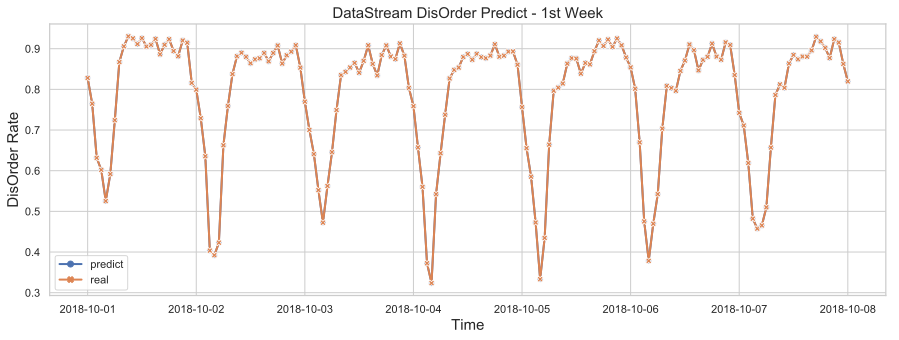

In [12]:
# plt.figure(figsize=(15, 5))
f, ax = plt.subplots(figsize = (15, 5))
# 设置图名称
ax.set_title('DataStream DisOrder Predict - 1st Week', fontsize=15)
# 设置X轴 Y轴 的label
ax.set_xlabel('Time',fontsize=15)
ax.set_ylabel('DisOrder Rate',fontsize=15)
sns.lineplot(size='event',
             markers=True,dashes=False,
             data=dt_df[:169])

## 保存模型为PMML

In [13]:
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn2pmml import sklearn2pmml
from sklearn.tree import DecisionTreeRegressor

In [14]:
pipline = PMMLPipeline([('classifier', DecisionTreeRegressor())])
pipline.fit(train_x, train_y)

PMMLPipeline(steps=[('classifier', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'))])

In [15]:
sklearn2pmml(pipline, "./treemodel.pmml", with_repr=True)